<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/DL-SatelliteImagery/Satellite_Imagery_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
!pip install -U segmentation-models

In [132]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [133]:
minmaxscaler = MinMaxScaler()

In [134]:
dataset_root_folder = '/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data'

In [135]:
dataset_name = "Dubai_dataset"

In [136]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 3/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 8/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 7/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 4/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 6/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 1/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 5/masks
/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 2/masks


In [137]:
image_patch_size = 256

In [138]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [139]:
image.shape

(544, 509, 3)

In [140]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [141]:
len(image_patches)

2

In [142]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [143]:
minmaxscaler = MinMaxScaler()

In [144]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [145]:
image_y[0].shape

(256, 256, 3)

In [146]:
print(type(image))

<class 'numpy.ndarray'>


In [147]:
type(Image.fromarray(image))

PIL.Image.Image

In [148]:
image.shape

(544, 509, 3)

In [149]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [150]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


[ WARN:0@2826.986] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2826.986] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2826.986] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2826.986] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 1/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2826.987] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data

[ WARN:0@2828.794] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 5/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2828.795] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 5/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2828.795] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 5/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2828.795] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 5/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2828.795] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data

[ WARN:0@2832.381] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 3/masks/image_part_0010.png'): can't open/read file: check file path/integrity
[ WARN:0@2832.381] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 3/masks/image_part_0011.png'): can't open/read file: check file path/integrity
[ WARN:0@2832.381] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 3/masks/image_part_0012.png'): can't open/read file: check file path/integrity
[ WARN:0@2832.381] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 3/masks/image_part_0013.png'): can't open/read file: check file path/integrity
[ WARN:0@2832.381] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dub

[ WARN:0@2833.240] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 7/masks/image_part_0010.png'): can't open/read file: check file path/integrity
[ WARN:0@2833.240] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 7/masks/image_part_0011.png'): can't open/read file: check file path/integrity
[ WARN:0@2833.240] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 7/masks/image_part_0012.png'): can't open/read file: check file path/integrity
[ WARN:0@2833.240] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dubai_dataset/Tile 7/masks/image_part_0013.png'): can't open/read file: check file path/integrity
[ WARN:0@2833.241] global loadsave.cpp:244 findDecoder imread_('/mnt/beegfs/home/jgyegyiri2023/apps/Project/Project_data/Dub

In [151]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [152]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [153]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [154]:
type(image_dataset[0])

numpy.ndarray

In [155]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

In [159]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [160]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [161]:
mask_dataset.shape[0]

945

In [162]:
label = individual_patched_mask

In [163]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [164]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [165]:
print(len(labels))

945


In [166]:
labels = np.array(labels)

In [167]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [168]:
labels = np.expand_dims(labels, axis=3)

In [169]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [170]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [171]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


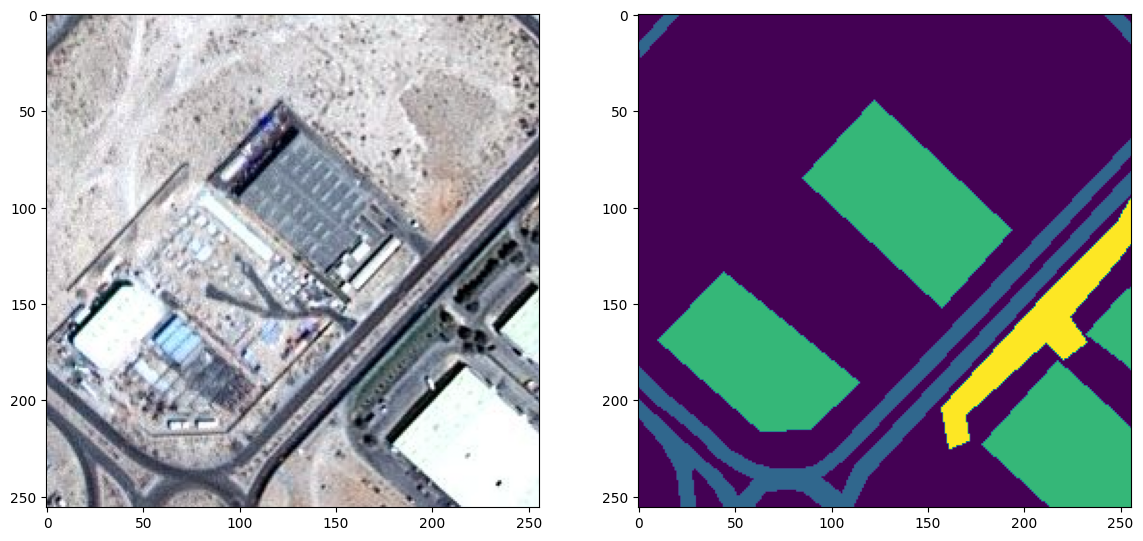

In [173]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [174]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [175]:
total_classes = len(np.unique(labels))

In [176]:
total_classes

6

In [177]:
from tensorflow.keras.utils import to_categorical

In [178]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [179]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [180]:
#master_trianing_dataset.shape

In [181]:
master_trianing_dataset = image_dataset

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [184]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [185]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [186]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


**Part two**


In [187]:
import tensorflow as tf

In [188]:

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [189]:
from tensorflow.keras import backend as K

In [190]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [191]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [192]:
metrics = ["accuracy", jaccard_coef]

In [193]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [194]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [195]:
#def get_deep_learning_model2():
 # return Resnet50_unet_model(n_classes=total_classes,
  #                        image_height=image_height,
   #                       image_width=image_width,
    #                      image_channels=image_channels)

In [196]:
model = get_deep_learning_model()


Generating Loss Function
dice loss > Focal Loss > Total Loss
Total Loss = (Dice loss + (1*Focal Loss))

In [197]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [198]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [199]:
import segmentation_models as sm

In [200]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [201]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [202]:
total_loss = dice_loss + (1 * focal_loss)

In [233]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 394.6 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 902.9 kB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 120.7 kB/s eta 0:00:0000:01
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=f6abf351e0a1df9ca476fd92baa45bd094dffa91345c471a8383348423ffd2ba
  Stored in directory: /mnt/beegfs/home/jgyegyiri2023/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools


In [246]:
!wandb login 6674c72e2f745c9c96267e5b3348c1175fb4b3a5

wandb: Appending key for api.wandb.ai to your netrc file: /mnt/beegfs/home/jgyegyiri2023/.netrc


In [245]:
!pip install keras-2.10.0


ERROR: Could not find a version that satisfies the requirement keras-2.10.0 (from versions: none)
ERROR: No matching distribution found for keras-2.10.0


In [250]:
import wandb

%env "WANDB_NOTEBOOK_NAME" "segmentation"
    

env: "WANDB_NOTEBOOK_NAME"="segmentation"


In [251]:
wandb.init(
    # set the wandb project where this run will be logged
    project="segmentation2023", entity ='jgyegyiri2023')

In [249]:
!wandb login --relogin 6674c72e2f745c9c96267e5b3348c1175fb4b3a5

wandb: Appending key for api.wandb.ai to your netrc file: /mnt/beegfs/home/jgyegyiri2023/.netrc


Model compilation

In [252]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True),
    TensorBoard(log_dir='logs')
]


2023-08-23 13:10:18.317143: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-08-23 13:10:18.317206: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-08-23 13:10:18.317497: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-08-23 13:10:18.317578: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [253]:
tf.keras.backend.clear_session()

In [254]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [255]:
#model1.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [256]:
#model.summary()

In [257]:
#model1.summary()

In [258]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=200,
                          validation_data=(X_test, y_test),
                          shuffle=False,
                         callbacks=callbacks)
                         

Epoch 1/200
 2/51 [>.............................] - ETA: 5s - loss: 0.8542 - accuracy: 0.9397 - jaccard_coef: 0.8701  

2023-08-23 13:10:29.777590: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-08-23 13:10:29.777629: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-08-23 13:10:29.777691: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


 5/51 [=>............................] - ETA: 6s - loss: 0.8557 - accuracy: 0.9471 - jaccard_coef: 0.8835

2023-08-23 13:10:29.962843: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-08-23 13:10:29.971124: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-08-23 13:10:29.973460: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-08-23 13:10:30.019280: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2023_08_23_13_10_29
2023-08-23 13:10:30.023775: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_08_23_13_10_29/nodenviv100009.hpc.fau.edu.trace.json.gz
2023-08-23 13:10:30.082554: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2023_08_23_13_10_29
2023-08-23 13:10:30.099729: I tensorflow/core/profiler/rpc/client/save_profile.

51/51 [==============================] - 6s 89ms/step - loss: 0.8599 - accuracy: 0.9485 - jaccard_coef: 0.8844 - val_loss: 0.9154 - val_accuracy: 0.8672 - val_jaccard_coef: 0.7575
Epoch 2/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8574 - accuracy: 0.9537 - jaccard_coef: 0.8955 - val_loss: 0.9163 - val_accuracy: 0.8722 - val_jaccard_coef: 0.7667
Epoch 3/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8574 - accuracy: 0.9537 - jaccard_coef: 0.8958 - val_loss: 0.9107 - val_accuracy: 0.8700 - val_jaccard_coef: 0.7605
Epoch 4/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8618 - accuracy: 0.9436 - jaccard_coef: 0.8745 - val_loss: 0.9208 - val_accuracy: 0.8603 - val_jaccard_coef: 0.7470
Epoch 5/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8597 - accuracy: 0.9489 - jaccard_coef: 0.8856 - val_loss: 0.9126 - val_accuracy: 0.8651 - val_jaccard_coef: 0.7509
Epoch 6/200
51/51 [==============================] -

51/51 [==============================] - 3s 62ms/step - loss: 0.8557 - accuracy: 0.9566 - jaccard_coef: 0.9012 - val_loss: 0.9301 - val_accuracy: 0.8299 - val_jaccard_coef: 0.7013
Epoch 44/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8610 - accuracy: 0.9448 - jaccard_coef: 0.8769 - val_loss: 0.9138 - val_accuracy: 0.8652 - val_jaccard_coef: 0.7525
Epoch 45/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8602 - accuracy: 0.9462 - jaccard_coef: 0.8799 - val_loss: 0.9117 - val_accuracy: 0.8720 - val_jaccard_coef: 0.7640
Epoch 46/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8563 - accuracy: 0.9553 - jaccard_coef: 0.8985 - val_loss: 0.9138 - val_accuracy: 0.8689 - val_jaccard_coef: 0.7583
Epoch 47/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8561 - accuracy: 0.9554 - jaccard_coef: 0.8987 - val_loss: 0.9152 - val_accuracy: 0.8669 - val_jaccard_coef: 0.7567
Epoch 48/200
51/51 [============================

51/51 [==============================] - 3s 62ms/step - loss: 0.8529 - accuracy: 0.9632 - jaccard_coef: 0.9158 - val_loss: 0.9170 - val_accuracy: 0.8707 - val_jaccard_coef: 0.7641
Epoch 86/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8533 - accuracy: 0.9621 - jaccard_coef: 0.9132 - val_loss: 0.9197 - val_accuracy: 0.8691 - val_jaccard_coef: 0.7623
Epoch 87/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8535 - accuracy: 0.9616 - jaccard_coef: 0.9126 - val_loss: 0.9171 - val_accuracy: 0.8706 - val_jaccard_coef: 0.7651
Epoch 88/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8527 - accuracy: 0.9637 - jaccard_coef: 0.9172 - val_loss: 0.9184 - val_accuracy: 0.8705 - val_jaccard_coef: 0.7647
Epoch 89/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8532 - accuracy: 0.9628 - jaccard_coef: 0.9149 - val_loss: 0.9170 - val_accuracy: 0.8698 - val_jaccard_coef: 0.7628
Epoch 90/200
51/51 [============================

51/51 [==============================] - 3s 62ms/step - loss: 0.8629 - accuracy: 0.9402 - jaccard_coef: 0.8665 - val_loss: 0.9154 - val_accuracy: 0.8630 - val_jaccard_coef: 0.7502
Epoch 128/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8571 - accuracy: 0.9525 - jaccard_coef: 0.8925 - val_loss: 0.9118 - val_accuracy: 0.8729 - val_jaccard_coef: 0.7650
Epoch 129/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8552 - accuracy: 0.9574 - jaccard_coef: 0.9025 - val_loss: 0.9133 - val_accuracy: 0.8733 - val_jaccard_coef: 0.7676
Epoch 130/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8537 - accuracy: 0.9610 - jaccard_coef: 0.9108 - val_loss: 0.9206 - val_accuracy: 0.8658 - val_jaccard_coef: 0.7556
Epoch 131/200
51/51 [==============================] - 3s 63ms/step - loss: 0.8560 - accuracy: 0.9561 - jaccard_coef: 0.9003 - val_loss: 0.9120 - val_accuracy: 0.8750 - val_jaccard_coef: 0.7706
Epoch 132/200
51/51 [=======================

51/51 [==============================] - 3s 62ms/step - loss: 0.8536 - accuracy: 0.9607 - jaccard_coef: 0.9109 - val_loss: 0.9152 - val_accuracy: 0.8722 - val_jaccard_coef: 0.7679
Epoch 170/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8520 - accuracy: 0.9649 - jaccard_coef: 0.9194 - val_loss: 0.9153 - val_accuracy: 0.8772 - val_jaccard_coef: 0.7761
Epoch 171/200
51/51 [==============================] - 3s 63ms/step - loss: 0.8513 - accuracy: 0.9666 - jaccard_coef: 0.9234 - val_loss: 0.9150 - val_accuracy: 0.8761 - val_jaccard_coef: 0.7744
Epoch 172/200
51/51 [==============================] - 3s 62ms/step - loss: 0.8510 - accuracy: 0.9673 - jaccard_coef: 0.9253 - val_loss: 0.9166 - val_accuracy: 0.8731 - val_jaccard_coef: 0.7692
Epoch 173/200
51/51 [==============================] - 3s 61ms/step - loss: 0.8555 - accuracy: 0.9592 - jaccard_coef: 0.9078 - val_loss: 0.9135 - val_accuracy: 0.8759 - val_jaccard_coef: 0.7732
Epoch 174/200
51/51 [=======================

In [259]:
history_a = model_history

In [260]:
#history_b = model_history2

In [261]:
history_a.history

{'loss': [0.8601584434509277,
  0.858535647392273,
  0.8589146137237549,
  0.8616416454315186,
  0.8603838086128235,
  0.8590263724327087,
  0.8581543564796448,
  0.858674943447113,
  0.8580184578895569,
  0.857181966304779,
  0.8568433523178101,
  0.857085108757019,
  0.8564866781234741,
  0.8588276505470276,
  0.8595070838928223,
  0.8575500845909119,
  0.8565226793289185,
  0.8564602732658386,
  0.8572066426277161,
  0.8579049706459045,
  0.8569951057434082,
  0.8563688397407532,
  0.8558514714241028,
  0.8557252287864685,
  0.8557822704315186,
  0.8558895587921143,
  0.856689989566803,
  0.8563409447669983,
  0.8562249541282654,
  0.85694819688797,
  0.8571427464485168,
  0.8712486624717712,
  0.884615957736969,
  0.8676945567131042,
  0.8622974157333374,
  0.8588789701461792,
  0.8576006293296814,
  0.8569109439849854,
  0.8567959666252136,
  0.8572698831558228,
  0.8567932844161987,
  0.8563020825386047,
  0.8565430045127869,
  0.8595080971717834,
  0.8593341708183289,
  0.856534

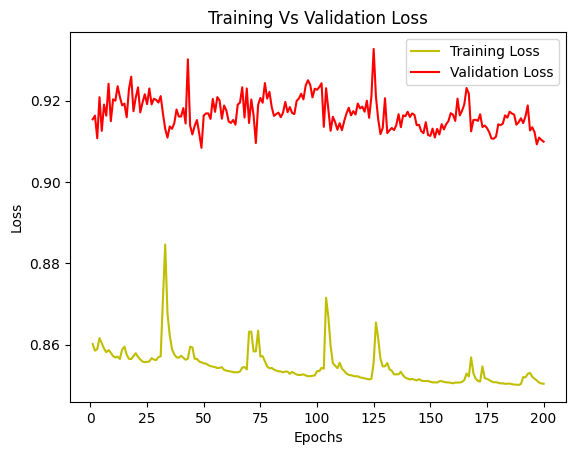

In [262]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

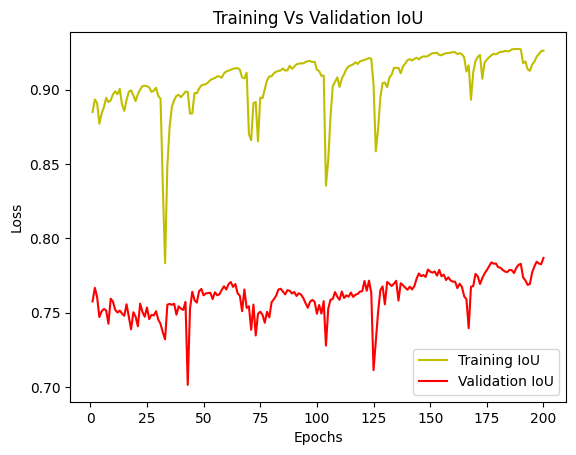

In [263]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [264]:
model_history.params


{'verbose': 1, 'epochs': 200, 'steps': 51}

In [265]:
y_pred = model.predict(X_test)

In [266]:
len(y_pred)



142

In [267]:
y_pred

array([[[[3.19794239e-03, 8.44924986e-01, 1.02811836e-01,
          4.49449755e-02, 4.07474861e-03, 4.55125155e-05],
         [1.52582338e-03, 8.55651081e-01, 9.73251015e-02,
          4.39560749e-02, 1.52860663e-03, 1.33291969e-05],
         [8.17724271e-04, 8.05580497e-01, 1.56617507e-01,
          3.47447246e-02, 2.20461632e-03, 3.49984766e-05],
         ...,
         [2.05486103e-05, 4.25273739e-02, 1.51147437e-03,
          9.48845267e-01, 7.09529733e-03, 5.08139841e-09],
         [2.98761461e-05, 4.65122648e-02, 2.12348788e-03,
          9.45435822e-01, 5.89849288e-03, 9.07490794e-09],
         [2.37406668e-04, 8.80226865e-02, 1.04085980e-02,
          8.85565341e-01, 1.57655366e-02, 4.50684269e-07]],

        [[7.21758581e-04, 8.78178358e-01, 9.52327624e-02,
          2.51171235e-02, 7.48613034e-04, 1.45168838e-06],
         [1.53668589e-04, 9.29890692e-01, 5.14326170e-02,
          1.84153039e-02, 1.07535277e-04, 2.54874067e-07],
         [5.27830671e-05, 8.80210161e-01, 1.0500

In [268]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [269]:
len(y_pred_argmax)

142

In [270]:
y_pred_argmax

array([[[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 2, 2, ..., 1, 1, 1],
        [1, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 1]],

       ...,

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [271]:
y_test_argmax = np.argmax(y_test, axis=3)

In [272]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Comparing prediction results
using test images using mask images and predicted result images..

In [273]:
import random

In [277]:
model.loss.name

'dice_loss_plus_1focal_loss'

In [274]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

IndexError: index 142 is out of bounds for axis 0 with size 142

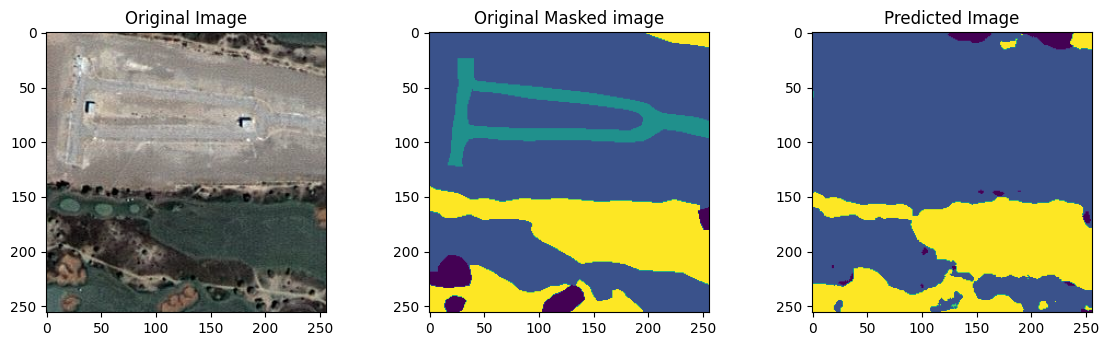

In [231]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [232]:
model.save("segmentation_model.h5")

In [275]:
from tensorflow.keras.models import load_model

In [278]:
model_s= load_model('model_checkpoint.h5', custom_objects=({'dice_loss_plus_1focal_loss':total_loss,'jaccard_coef':jaccard_coef}))

In [279]:
model_s.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'name': '

In [280]:
!pip install keract

In [281]:
import keract as ke

In [285]:
activations=ke.get_activations(model_s,X_test, nodes_to_evaluate=None, output_format='simple', auto_compile=True)

In [286]:
ls -lah activations


total 512
drwxr-xr-x 2 jgyegyiri2023 jgyegyiri2023 0 Aug 23 14:01 ./
drwxrwx--x 7 jgyegyiri2023 jgyegyiri2023 9 Aug 23 14:05 ../


In [287]:
ke.display_activations(activations,cmap='viridis', save=True, directory ='activations')

input_1 (142, 256, 256, 3) -> Skipped. First dimension is not 1.
conv2d (142, 256, 256, 16) -> Skipped. First dimension is not 1.
dropout (142, 256, 256, 16) -> Skipped. First dimension is not 1.
conv2d_1 (142, 256, 256, 16) -> Skipped. First dimension is not 1.
max_pooling2d (142, 128, 128, 16) -> Skipped. First dimension is not 1.
conv2d_2 (142, 128, 128, 32) -> Skipped. First dimension is not 1.
dropout_1 (142, 128, 128, 32) -> Skipped. First dimension is not 1.
conv2d_3 (142, 128, 128, 32) -> Skipped. First dimension is not 1.
max_pooling2d_1 (142, 64, 64, 32) -> Skipped. First dimension is not 1.
conv2d_4 (142, 64, 64, 64) -> Skipped. First dimension is not 1.
dropout_2 (142, 64, 64, 64) -> Skipped. First dimension is not 1.
conv2d_5 (142, 64, 64, 64) -> Skipped. First dimension is not 1.
max_pooling2d_2 (142, 32, 32, 64) -> Skipped. First dimension is not 1.
conv2d_6 (142, 32, 32, 128) -> Skipped. First dimension is not 1.
dropout_3 (142, 32, 32, 128) -> Skipped. First dimension 

In [ ]:
plt.imshow(Image.open('activations/'))